## Prática 01 - Geração de Canal Plano Rayleigh

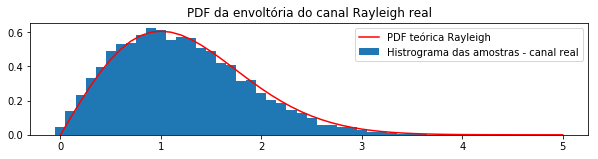

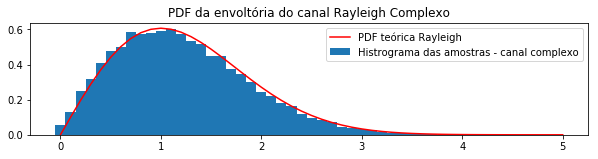

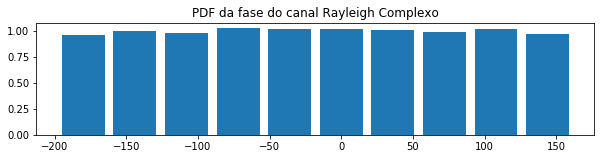

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
#
# Parâmetros
N = 20000                                  # Número de amostras
ts = 0.1
x=np.arange(0,5+ts,ts)                     # Eixo x
sigma = 1                                  # Parâmetro Rayleigh
u = np.random.rand(N)                      # Amostras aleatórias uniformemente distribuídas de 0 a 1
#
# Canal Rayleigh real via método da inversão
rReal = sigma*np.sqrt(-2*np.log(u))        # Rayleigh via método da inversão
#
# PDF Rayleigh teórico 
pdfTeo = x/(sigma**2)*np.exp(-(x/sigma)**2/2) 
# 
# Canal Rayleigh complexo via VAs Gaussianas independentes
rComplexo = np.random.randn(N)+1j*np.random.randn(N)
#
# Gráficos
plt.figure(1,[10,7])
plt.subplot(3,1,1)
# Histograma do Canal real vs PDF teórica
[xh, temp]=np.histogram(rReal,bins=x)
temp = temp[0:len(temp)-1]
width = ts
plt.bar(temp,xh/(np.sum(xh)*ts),width,label='Histrograma das amostras - canal real')
#
# PDF teórica
plt.plot(x,pdfTeo,'r', label='PDF teórica Rayleigh')
#
plt.title('PDF da envoltória do canal Rayleigh real')
plt.legend()
plt.show()
#
# Envoltória do Canal complexo
plt.figure(1,[10,7])
plt.subplot(3,1,2)
# Histograma da envoltória do canal complexo vs PDF teórica
[xh, temp]=np.histogram(np.abs(rComplexo),bins=x)
temp = temp[0:len(temp)-1]
width = ts
plt.bar(temp,xh/(np.sum(xh)*ts),width,label='Histrograma das amostras - canal complexo')
#
# PDF teórica
plt.plot(x,pdfTeo,'r', label='PDF teórica Rayleigh')
#
plt.title('PDF da envoltória do canal Rayleigh Complexo')
plt.legend()
plt.show()
# Histrograma da Fase do Canal complexo
plt.figure(1,[10,7])
plt.subplot(3,1,3)
[xhra, tempra]=np.histogram(np.angle(rComplexo))
tempra = tempra[0:len(tempra)-1]
plt.bar(180/np.pi*tempra,xhra/(np.sum(xhra)*ts),width=30)
plt.title('PDF da fase do canal Rayleigh Complexo')
plt.show()



## Prática 2: Geração de canal plano com desvanecimento Rice

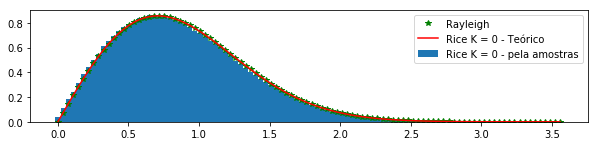

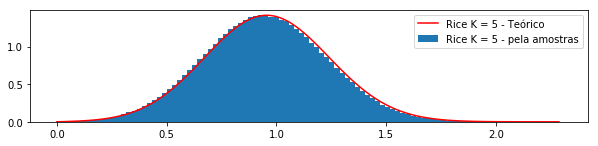

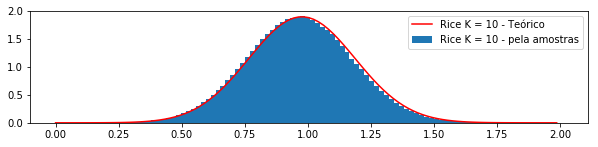

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import iv as besselI
#
# Parâmetros
N = int(1e6)                                        # Número de amostras a gerar
vtK = [0,5,10]                                   # Fatores K Ricianos a simular
totPower=1                                          # Total power of LOS path & scattered paths
#
# Loop nos valores de K
for ik in range(len(vtK)):
    K = vtK[ik]
    s=np.sqrt(K/(K+1)*totPower)                     # Parâmetro de não centralidade
    sigma=totPower/np.sqrt(2*(K+1))
    # Amostras do Canal Rice
    X = s + sigma*np.random.randn(N)                # LOS: VA Gaussina com média=s e sigma definido
    Y = 0 + sigma*np.random.randn(N)                # NLOS: VA Gaussina com média=0 e sigma definido
    Z = X + 1j*Y
    [val,bins]=np.histogram(np.abs(Z),bins=100)     # Histograma de Z
    bins = bins[0:len(bins)-1]                      # Ajuste do eixo
    #
    # PDF Rice teórica
    binWidth = bins[2]-bins[1]
    r = np.arange(0,np.max(bins),binWidth)
    plt.figure(1,[10,7])
    plt.subplot('{}{}{}'.format(len(vtK),1,ik))
    # PDF teórica Rayleigh (para comparação)    
    if K == 0:
        rayleigh_pdf = r/(sigma**2)*np.exp(-r**2/(2*sigma**2))
        plt.plot(r,rayleigh_pdf,'g*', label = 'Rayleigh')
    fRice = 2*r*(K+1)/totPower*np.exp(-r**2*(K+1)/totPower-K)*besselI(0,2*r*np.sqrt(K*(K+1)/totPower))
    # Gráficos
    plt.bar(bins,val/(binWidth*np.sum(val)),binWidth, label='Rice K = {} - pela amostras'.format(K))    
    plt.plot(r,fRice,'r',label='Rice K = {} - Teórico'.format(K))
    plt.legend()
    plt.show()